In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
# Carregar o arquivo CSV em um DataFrame
df = pd.read_csv('/kaggle/input/employee-data-analysis/general_data.csv')


# Visualizar as colunas
print(df.columns)

/kaggle/input/employee-data-analysis/manager_survey_data.csv
/kaggle/input/employee-data-analysis/employee_survey_data.csv
/kaggle/input/employee-data-analysis/general_data.csv
Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


In [2]:
# Renomeando as colunas
df = df.rename(columns={
    'Age': 'Idade',
    'Attrition': 'Atrito',
    'BusinessTravel': 'ViagemNegocios',
    'Department': 'Departamento',
    'DistanceFromHome': 'DistanciaCasa',
    'Education': 'Educacao',
    'EducationField': 'AreaEducacao',
    'EmployeeCount': 'ContagemFuncionarios',
    'EmployeeID': 'IDFuncionario',
    'Gender': 'Genero',
    'JobLevel': 'NivelCargo',
    'JobRole': 'Cargo',
    'MaritalStatus': 'EstadoCivil',
    'MonthlyIncome': 'RendaMensal',
    'NumCompaniesWorked': 'NumEmpresasAnteriores',
    'Over18': 'Maioridade',
    'PercentSalaryHike': 'AumentoPercentualSalario',
    'StandardHours': 'HorasPadrao',
    'StockOptionLevel': 'NivelOpcaoAcoes',
    'TotalWorkingYears': 'AnosTrabalhadosTotal',
    'TrainingTimesLastYear': 'NumTreinamentosAnoPassado',
    'YearsAtCompany': 'AnosNaEmpresa',
    'YearsSinceLastPromotion': 'AnosDesdeUltimaPromocao',
    'YearsWithCurrManager': 'AnosComGerenteAtual'
})


In [3]:
print(df.columns)

Index(['Idade', 'Atrito', 'ViagemNegocios', 'Departamento', 'DistanciaCasa',
       'Educacao', 'AreaEducacao', 'ContagemFuncionarios', 'IDFuncionario',
       'Genero', 'NivelCargo', 'Cargo', 'EstadoCivil', 'RendaMensal',
       'NumEmpresasAnteriores', 'Maioridade', 'AumentoPercentualSalario',
       'HorasPadrao', 'NivelOpcaoAcoes', 'AnosTrabalhadosTotal',
       'NumTreinamentosAnoPassado', 'AnosNaEmpresa', 'AnosDesdeUltimaPromocao',
       'AnosComGerenteAtual'],
      dtype='object')


In [4]:
# Distribuição por gênero, estado civil e educação
print('Distribuição por gênero, estado civil e educação')
genero_distribution = df['Genero'].value_counts()
estadocivil_distribution = df['EstadoCivil'].value_counts()
education_distribution = df['Educacao'].value_counts()

distribuicao = (genero_distribution,estadocivil_distribution, education_distribution)
distribuicao

Distribuição por gênero, estado civil e educação


(Genero
 Male      2646
 Female    1764
 Name: count, dtype: int64,
 EstadoCivil
 Married     2019
 Single      1410
 Divorced     981
 Name: count, dtype: int64,
 Educacao
 3    1716
 4    1194
 2     846
 1     510
 5     144
 Name: count, dtype: int64)

In [5]:
print('Distribuição de idade dos Funcionários')
idade_distribution = df['Idade'].value_counts().rename_axis('Idade').reset_index(name='Quantidade')
idade_distribution

Distribuição de idade dos Funcionários


,Idade,Quantidade
0,35,234
1,34,231
2,31,207
3,36,207
4,29,204
5,32,183
6,30,180
7,38,174
8,33,174
9,40,171


In [6]:
# mean => Calcula a Média Aritmética
# join => junta os array
# distancia média do trabalho para a casa dos funcionários
#.rename_axis('Idade').reset_index(name='Quantidade') => troca o nome das colunas

distancia_de_casa = round(df['DistanciaCasa'].mean())
departamentos = ', '.join(df['Departamento'].unique())
array_cargos = df['Cargo'].unique()
cargos = pd.DataFrame({'': array_cargos}) # onde está as aspas ele adiciona m título para a coluna
funcionarios = df['ContagemFuncionarios'].sum()
horas_padrao = round(df['HorasPadrao'].mean())
idade_med = round(df['Idade'].mean())
rendamensal = round(df['RendaMensal'].mean() / 30,2)
anosnaempresa = round(df['AnosNaEmpresa'].mean())
ultimapromo = round(df['AnosDesdeUltimaPromocao'].mean())
taxa_attrition = round((df['Atrito'].value_counts(normalize=True)*100),2).rename_axis('Tiveram Atrito ?').reset_index(name='Porcentagem %').to_string(index=True) #adicionei para retirar as informações que estavam sendo lançadas do tipo de dados


print('\n Atualmente a empresa tem',funcionarios, 'funcionários')
print('\n Em média os funcionários tem',idade_med, 'anos de idade')
print('\n Cargos existentes atualmente na empresa:')
print(cargos)
print('\n Departamentos:', departamentos)
print('\n A carga horária de trabalho é de',horas_padrao,'horas')
print('\n Média de salários da empresa de US$', rendamensal)
print('\n O plano de progressão na carreira ocorre em média a cada', ultimapromo,'anos' )
print('\n Os funcionários costumam ficar na empresa em média', anosnaempresa,'anos')
print('\n A distância média do trabalho para casa de cada funcionário é de ', distancia_de_casa, 'km')
print('\n Porcentagem com a qual os trabalhadores tiveram algum atrito e acabaram deixando a empresa: \n')
print(taxa_attrition)


 Atualmente a empresa tem 4410 funcionários

 Em média os funcionários tem 37 anos de idade

 Cargos existentes atualmente na empresa:
                            
0  Healthcare Representative
1         Research Scientist
2            Sales Executive
3            Human Resources
4          Research Director
5      Laboratory Technician
6     Manufacturing Director
7       Sales Representative
8                    Manager

 Departamentos: Sales, Research & Development, Human Resources

 A carga horária de trabalho é de 8 horas

 Média de salários da empresa de US$ 2167.64

 O plano de progressão na carreira ocorre em média a cada 2 anos

 Os funcionários costumam ficar na empresa em média 7 anos

 A distância média do trabalho para casa de cada funcionário é de  9 km

 Porcentagem com a qual os trabalhadores tiveram algum atrito e acabaram deixando a empresa: 

  Tiveram Atrito ?  Porcentagem %
0               No          83.88
1              Yes          16.12


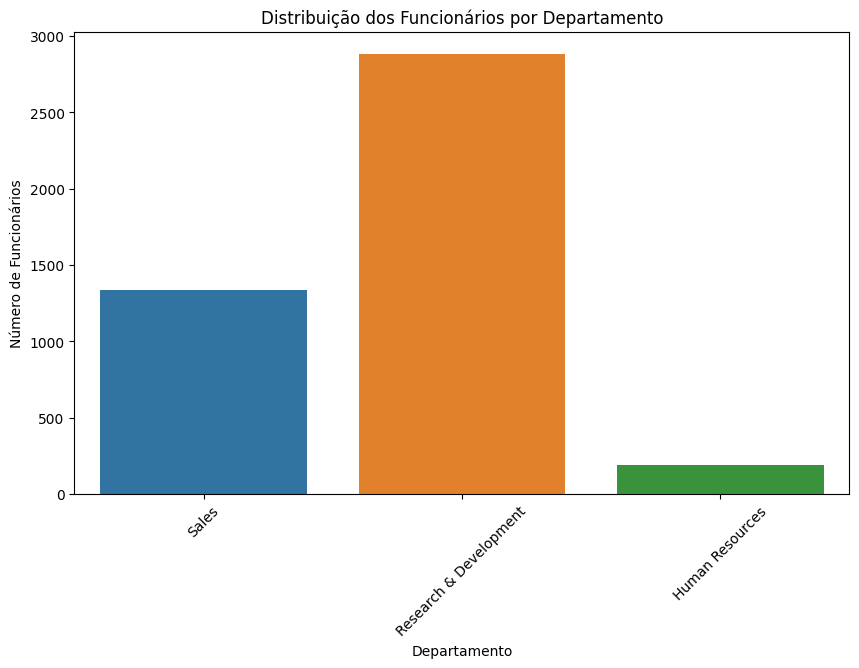

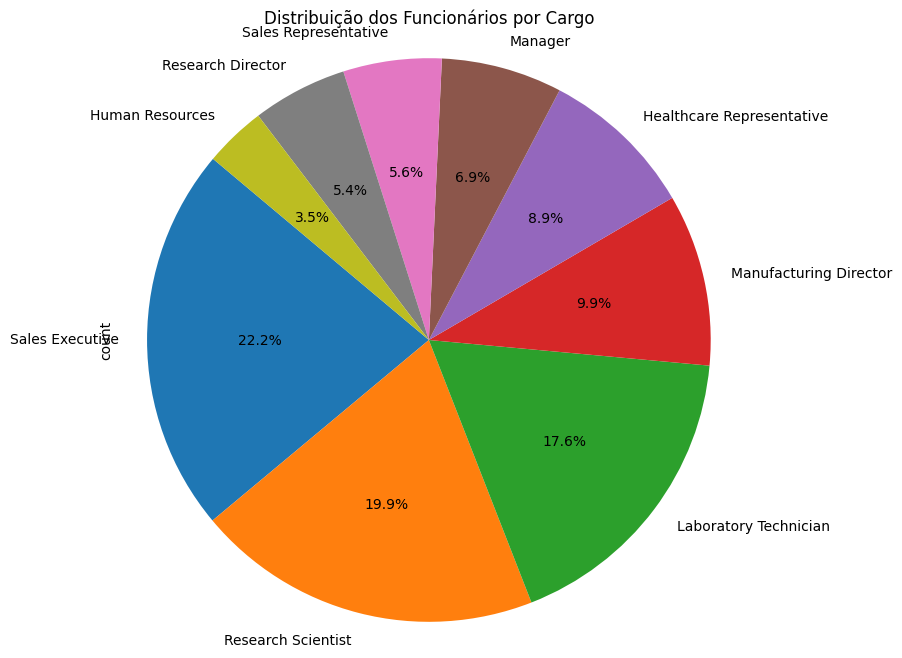

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


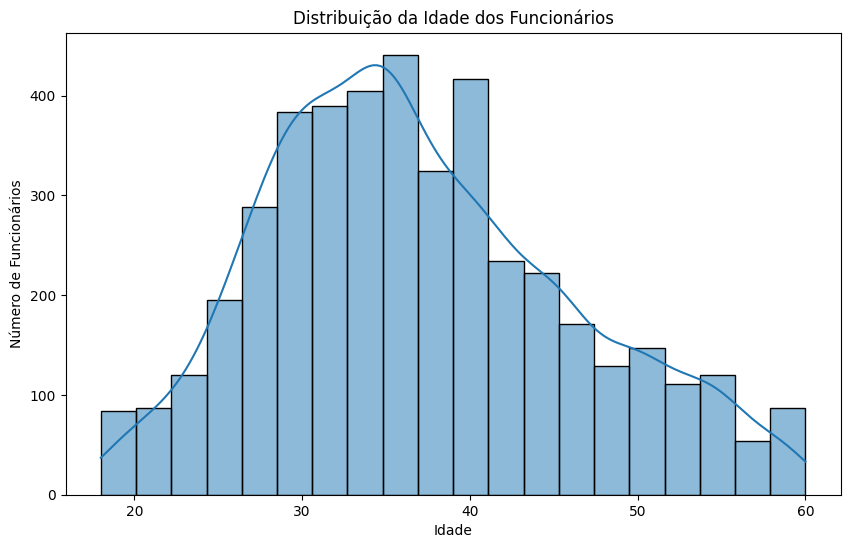

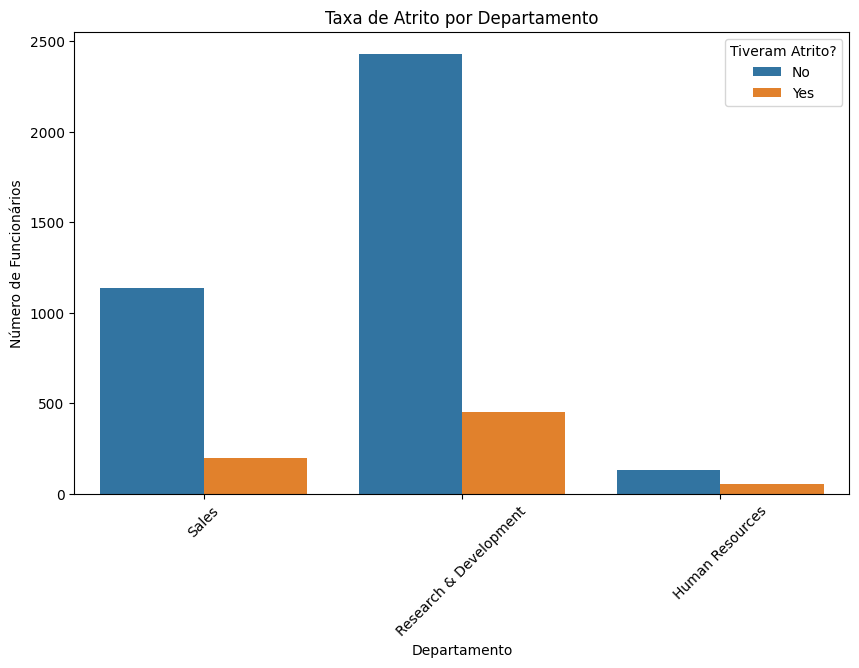

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de barras para distribuição dos departamentos
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Departamento')
plt.title('Distribuição dos Funcionários por Departamento')
plt.xlabel('Departamento')
plt.ylabel('Número de Funcionários')
plt.xticks(rotation=45)
plt.show()

# Gráfico de pizza para distribuição dos cargos
plt.figure(figsize=(8, 8))
df['Cargo'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribuição dos Funcionários por Cargo')
plt.axis('equal')
plt.show()

# Histograma para distribuição da idade dos funcionários
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Idade', bins=20, kde=True)
plt.title('Distribuição da Idade dos Funcionários')
plt.xlabel('Idade')
plt.ylabel('Número de Funcionários')
plt.show()

# Gráfico de barras empilhadas para comparar a taxa de atrito entre os departamentos
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Departamento', hue='Atrito')
plt.title('Taxa de Atrito por Departamento')
plt.xlabel('Departamento')
plt.ylabel('Número de Funcionários')
plt.xticks(rotation=45)
plt.legend(title='Tiveram Atrito?')
plt.show()
